# Face Detection

***Face detection Schemes:***

1. Haar Cascade Classifiers using OpenCV

2. Deep Learning based Face Detector in OpenCV

3. Histogram of Oriented Gradients using Dlib

4. Convolutional Neural Networks using Dlib

- Prerequisites: numpy, scipy, matplotlib, scikit-learn, Imutils

- OpenCV

    - Imutils
        Installing Imutils -----> pip install imutils

- Dlib: 
    - Download Dlib source: https://github.com/davisking/dlib

    - `python setup.py install`

# OpenCV

## 1. Haar Cascade

There are ***`some common features`***  called ***`Haar Features`*** that we find on most common human faces :

1. A dark eye region compared to upper-cheeks

2. A bright nose bridge region compared to the eyes

3. Some specific location of eyes, mouth, nose

***Feature extraction process using `various types and sizes of Harr Features`***

<nop/><div style="width:800px">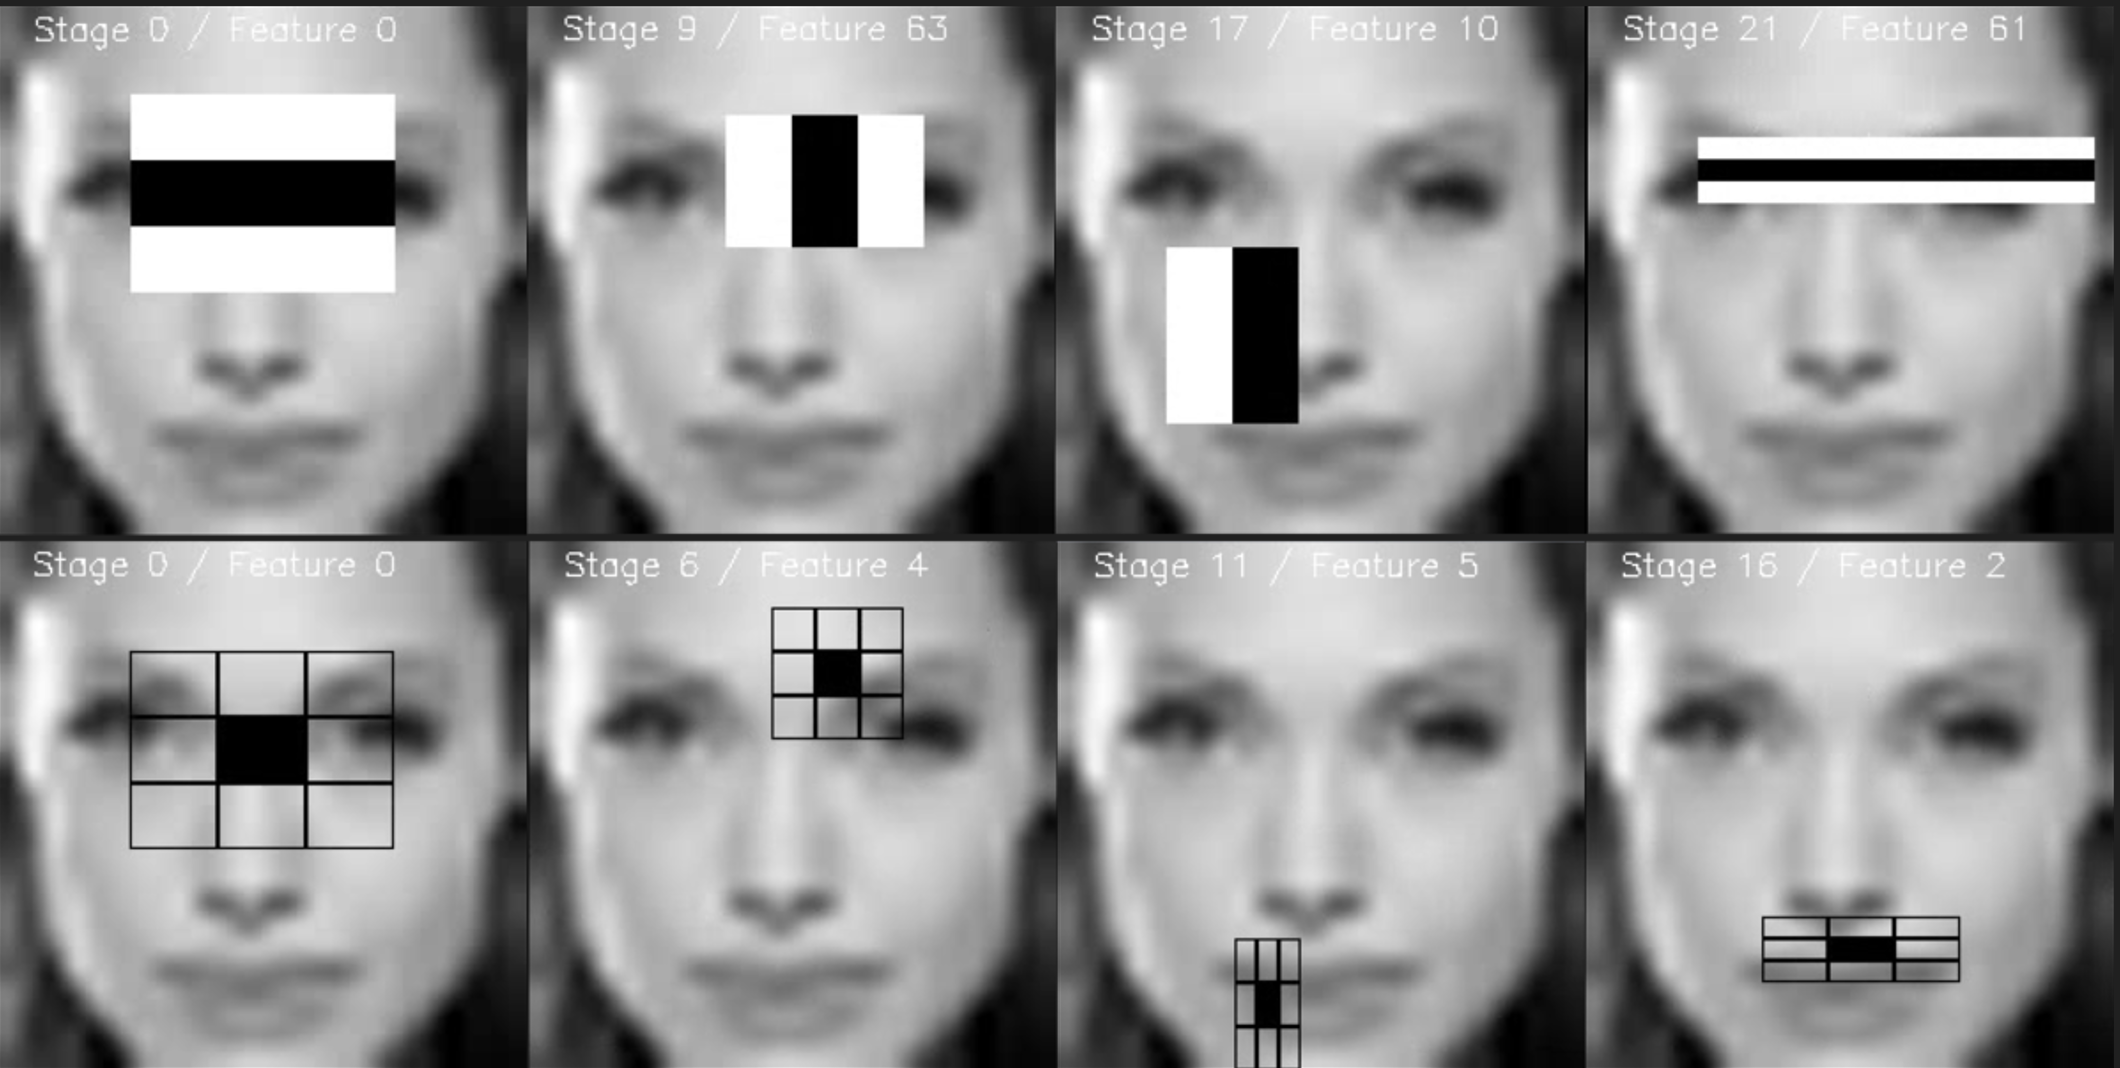</div> </nop>


<nop/><div style="width:800px">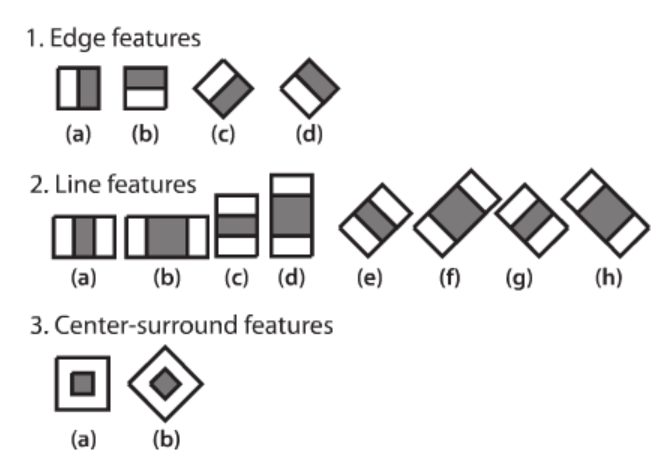</div> </nop>

1. The first feature measures the difference in intensity between the region of the eyes and a region across the upper cheeks.

- The feature value is simply computed by summing the pixels in the black area and subtracting the pixels in the white area.

    <nop/><div style="width:800px">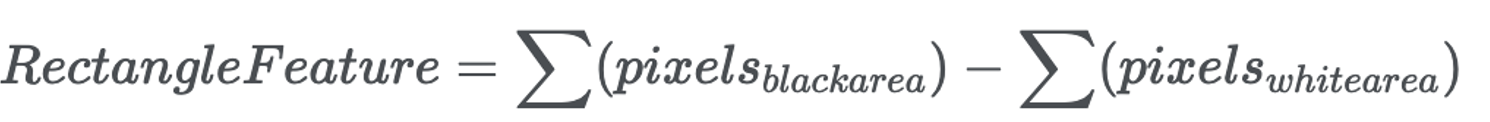</div> </nop>

2. Apply this rectangle as a convolutional kernel, `over our whole image`.

    - In order to be exhaustive, we should apply all possible dimensions and positions of each kernel.
    
    - A simple 24x24 images would typically result in over 160,000 features, each made of a sum/subtraction of pixels values.
    
    - It would computationally be impossible for live face detection.$\rightarrow$***`Cascade of Classifiers and Integral Images`***


#### Image 

#### Video 

#### Real-Time Using WebCam

### Pros
1. Works almost real-time on CPU
2. Simple Architecture
3. Detects faces at different scales

### Cons
1. A lot of False predictions.
2. Doesn’t work on non-frontal images.
3. Doesn’t work under occlusion

## 2. DNN Face Detector in OpenCV

- Included in OpenCV from version 3.3.

- Single-Shot-Multibox detector using ResNet-10 Architecture as the backbone.

- Trained using images available from the web.

- Two models.

    - Floating point 16 version of the `original caffe implementation`

    - 8 bit quantized version using Tensorflow

#### Image

#### Video

In [35]:
frame_bgr.shape

(720, 1280, 3)

#### Real Time Using WebCam

### Pros
The method has the following merits :
1. Most accurate out of the four methods when CPU

2. Runs at real-time on CPU

3. Works for different face orientations – up, down, left, right, side-face etc.

4. Detects faces across various scales ( detects big as well as tiny faces )

### Cons
1. Not very accurate

# Dlib

## 1. Histogram of Oriented Gradients (HOG)

***`HOG Feature Extraction`***

- HOG captures the local shape of objects within an image through a feature vector based on the distribution of direction gradients.

- The image is divided into `small square cells`, and for each cell, the pixel's direction gradients are calculated.

- These gradients are aggregated into histograms by direction to generate the HOG descriptor for each cell.


***`Sliding Window Search`***

- Dlib employs a sliding window approach using the HOG descriptors to detect faces across the entire image.

- `A HOG descriptor` is extracted at `each window position` and then fed into a classifier.


***`Face Classification`***

- The extracted HOG descriptors are input into a pre-trained SVM (Support Vector Machine) classifier.

- This classifier determines whether each window contains a face.

- The SVM is trained using a large number of positive (face images) and negative (non-face images) samples.

***`Non-Maximum Suppression`***

- To avoid overlapping detection results, non-maximum suppression is used to eliminate weaker overlapping candidates.


***Gradient Values:*** Calculate the gradient magnitude and direction at each pixel using edge detection filters like Sobel.

<nop/><div style="width:300px">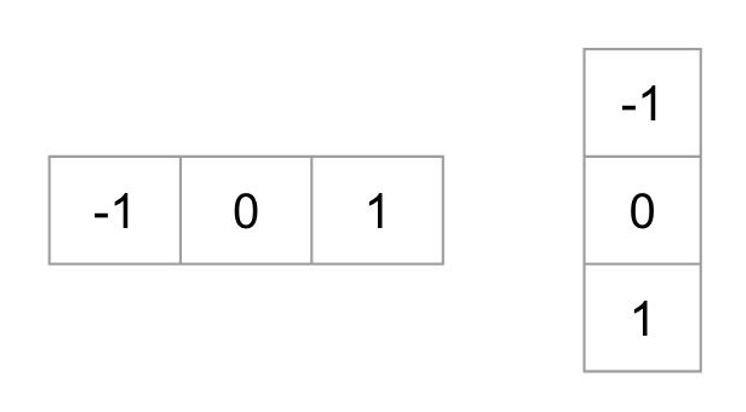 </div></nop>

- `Gradient Magnitude`: $ G = \sqrt{G_x^2 + G_y^2} $
- `Gradient Direction`: $ \theta = \arctan\left(\frac{G_y}{G_x}\right) $
  - Where $ G_x $ and $ G_y $ are gradients in the horizontal and vertical directions, respectively.

- It assess whether a face (or any object you train it to recognize actually) is present in a region or not.

    <nop/><div style="width:800px">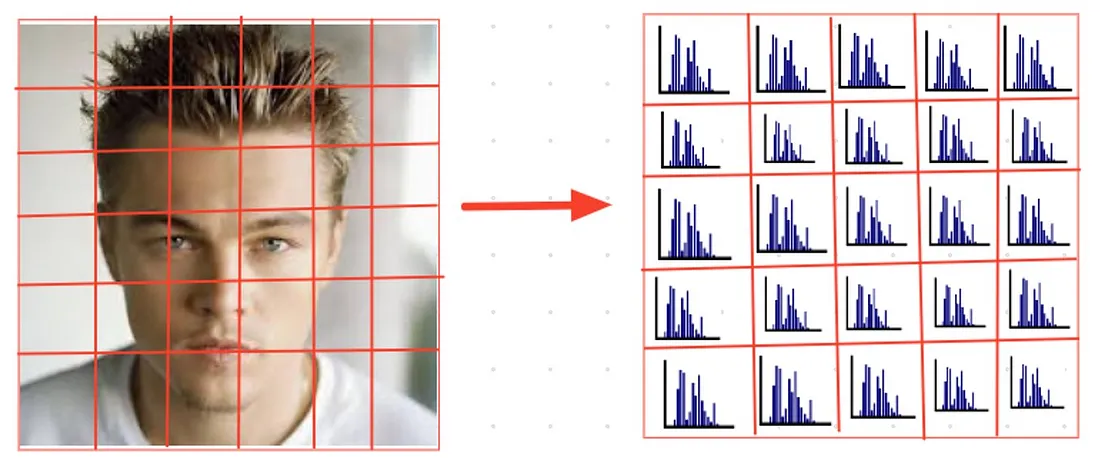</div></nop>


`If dlib compiled to support GPU` is slow, then re-install dlib not to support GPU.

- `python setup.py install --no DLIB_USE_CUDA`

In [1]:
import dlib
# This will print 'True' if dlib was compiled with CUDA support, otherwise 'False'
print(dlib.DLIB_USE_CUDA, dlib.cuda.get_device())

True 0


#### Image

#### Video

#### Real Time Using WebCam

### Pros
1. Works very well for frontal and slightly non-frontal faces

2. Light-weight model as compared to CNN.

3. Works under small occlusion

4. Basically, this method works under most cases except a few as discussed below.

### Cons
1. Does not detect small faces as it is trained for minimum face size of 80×80. 

2. The bounding box often excludes part of forehead and even part of chin sometimes.

3. Does not work for side face and extreme non-frontal faces, like looking down or up.

4. Slow for real time detections

## 2. Convolutional Neural Network in Dlib

- It uses a Maximum-Margin Object Detector(MMOD) with CNN based features.

- The training process for this method is very simple and you don’t need a large amount of data to train a custom object detector.

    - http://blog.dlib.net/2016/10/easily-create-high-quality-object.html

- The model can be downloaded from the dlib-models repository (https://github.com/davisking/dlib-models).

- Dataset can be downloaded from http://dlib.net/files/data/dlib_face_detection_dataset-2016-09-30.tar.gz


<nop><div style="width:800px">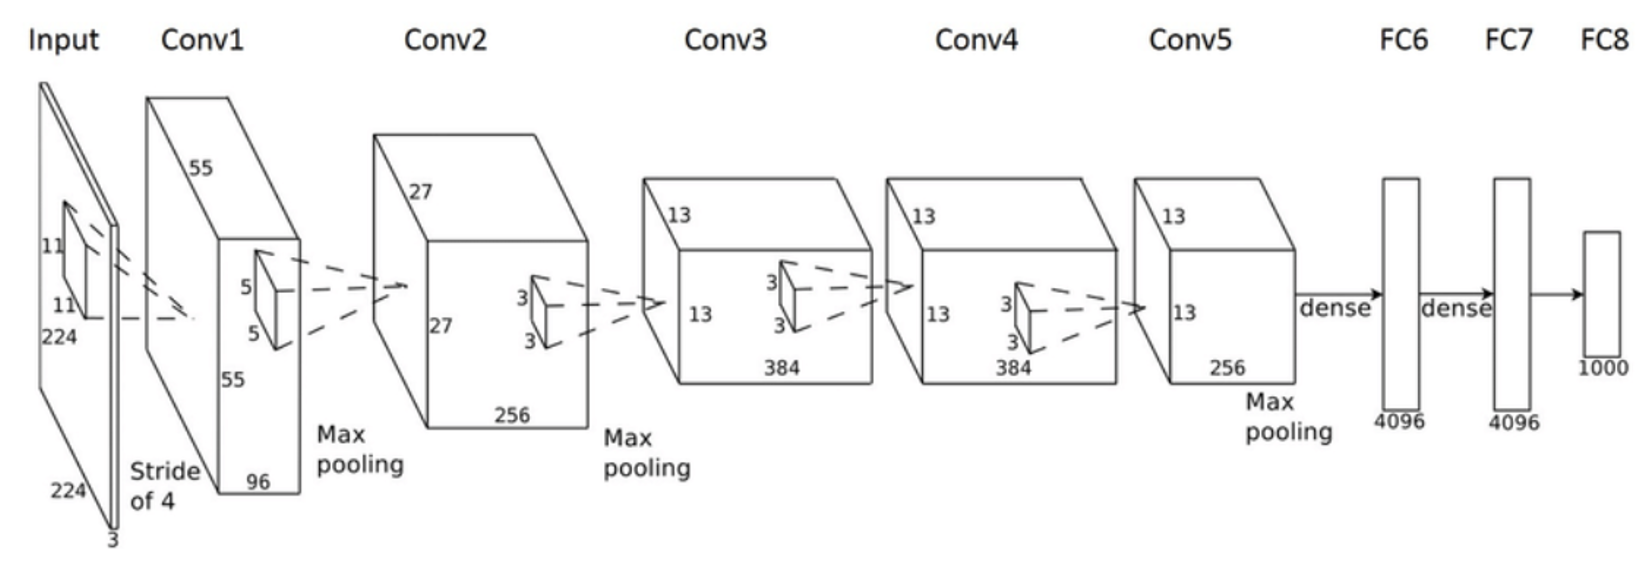</div></nop>

- The output of the CNN in this specific case is a `binary classification`.


***`Download the pre-trained model:`*** https://github.com/davisking/dlib-models/blob/master/mmod_human_face_detector.dat.bz2

#### Image

#### Video

#### Real Time Using WebCam

### Pros
1. Works for different face orientations

2. Works very fast on GPU

3. Very easy training process

### Cons
1. Very slow on CPU

2. Does not detect small faces as it is trained for minimum face size of 80×80. 

3. The bounding box is even smaller than the HoG detector.

## Comparison

- CPU

    - `Hog Dlib is the most accurate`
    
    - `OpenCV Haar cascade is the fastest`.
    
    - `OpenCV dnn` is a good tradeoff between speed and accuracy on CPU.

- GPU

    - `CNNs in Dlib tend to be the most accurate` algorithm
    
        - But they they don't work on smaller faces(which can be fixed by training on your own custom dataset).
        
    - `HoG Dlib` also perform pretty well but have some issues identifying small faces. 



0
